In [25]:
import numpy as np
import matplotlib.pyplot as plt

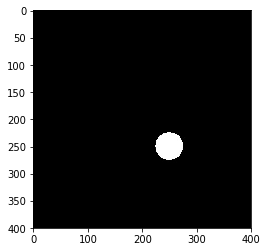

In [9]:
img = plt.imread('img/dot.jpg')
plt.imshow(img, cmap='gray')

In [12]:
img.shape

(400, 400, 3)

In [14]:
pixSums = np.zeros(400)

In [26]:
img[0][0]

array([0, 0, 0], dtype=uint8)

In [28]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

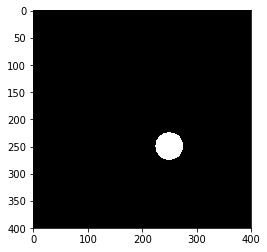

In [31]:
gray = rgb2gray(img)
plt.imshow(gray, cmap='gray')

In [34]:
gray.shape

(400, 400)

In [37]:
for i in range(gray.shape[0]):
    pixSums[i] = pixSums[i] + sum(gray[i])

In [41]:
x = np.linspace(0, 400, 400)

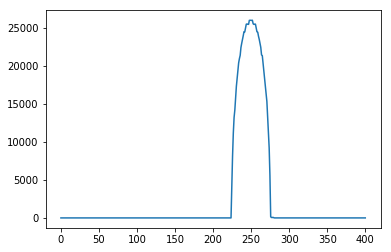

In [42]:
plt.plot(x, pixSums)